# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_path = r"C:\Users\jt4ha\Dark Sky Data Dropbox\JT Turner\Downloads\Starter_Code(5)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\jt4ha\Dark Sky Data Dropbox\JT Turner\Downloads\Starter_Code(5)\Starter_Code\Pymaceuticals\data\Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='inner')
# Display the data table for preview
print("Merged DataFrame!:\n", merge_df.head())



Merged DataFrame!:
   Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [3]:
# Checking the number of mice.
Mouse_ID = merge_df['Mouse ID']
Unique_ID_count = Mouse_ID.nunique()
print("Unique mouse count before cleaning:", Unique_ID_count)

Unique mouse count before cleaning: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_ids = duplicates["Mouse ID"].unique()
print("Duplicate Mouse IDs:", dup_ids)

Duplicate Mouse IDs: ['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
data_attached_to_dup_ids = merge_df[merge_df['Mouse ID'].isin(dup_ids)]
print(duplicates.to_string(index=False))

Data for duplicate Mouse IDs:
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
Mouse ID Drug Regimen    Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
    g989     Propriva Female          21          26          0           45.000000                 0
    g989     Propriva Female          21          26          0     

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_no_duplicates = merge_df[~merge_df['Mouse ID'].isin(dup_ids)]
df_no_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
Mouse_ID_cleaned = df_no_duplicates['Mouse ID']
Unique_ID_count_cleaned = Mouse_ID_cleaned.nunique()
print("Unique mouse count after cleaning:", Unique_ID_count_cleaned)

Unique mouse count after cleaning: 248


## Summary Statistics

In [14]:
grouped = df_no_duplicates.groupby('Drug Regimen')

# Calculate the statistics
mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
var = grouped['Tumor Volume (mm3)'].var()
std = grouped['Tumor Volume (mm3)'].std()
sem = grouped['Tumor Volume (mm3)'].sem()

# Assemble into a summary DataFrame
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': var,
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err.': sem
})

summary_df.index.name = 'Drug Regimen'
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

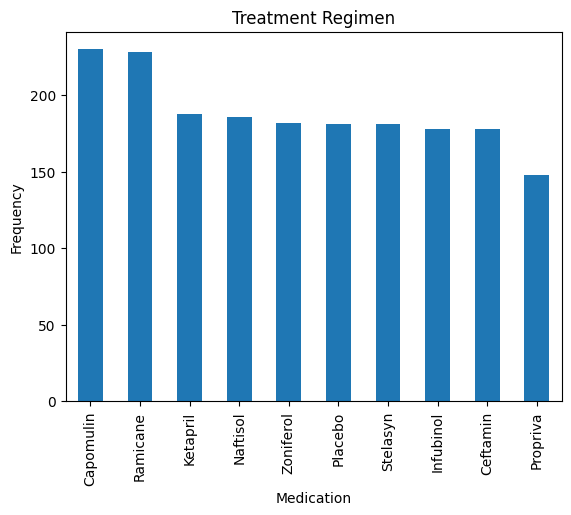

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
frequency = df_no_duplicates['Drug Regimen'].value_counts().reset_index()
frequency.columns = ['Drug Regimen', 'Tumor Volume (mm3)']


frequency.plot(kind='bar', x='Drug Regimen', y='Tumor Volume (mm3)', legend=False)

# Add labels and title
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.title('Treatment Regimen')


plt.show()

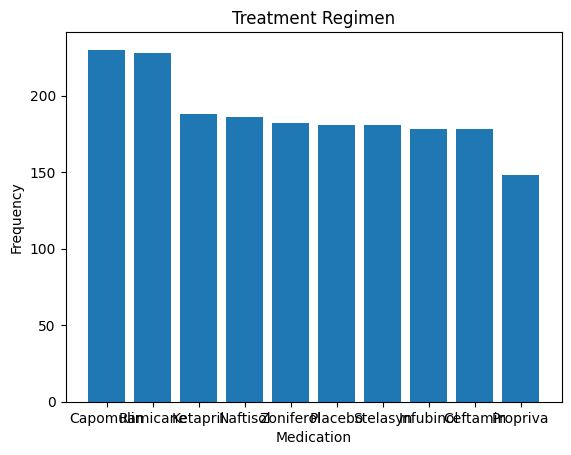

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(frequency['Drug Regimen'], frequency['Tumor Volume (mm3)'])

plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.title('Treatment Regimen')
plt.show()

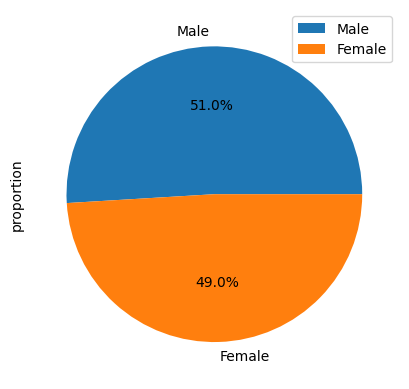

In [23]:
sex = df_no_duplicates['Sex'].value_counts(normalize=True) * 100


sex.plot.pie(autopct='%1.1f%%', legend=True)
plt.show()

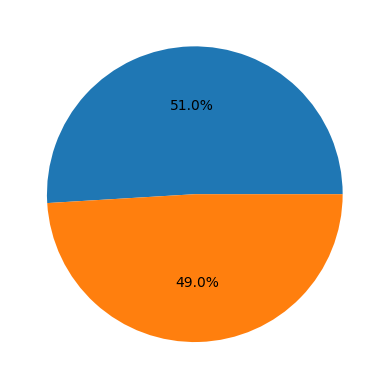

In [22]:
sex=df_no_duplicates['Sex'].value_counts(normalize=True)*100 #sex and gender are not the same

# Make the pie chart
plt.pie(sex, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [25]:
last_timepoints = df_no_duplicates.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_df = last_timepoints.merge(df_no_duplicates, on=['Mouse ID', 'Timepoint'], how='left')

# Filter to include only the four treatment regimens of interest
filtered_df = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

In [26]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []
for treatment in treatments:
    treatment_data = filtered_df[filtered_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    lower_bound = lower - (1.5 * iqr)
    upper_bound = upper + (1.5 * iqr)
    outliers = [value for value in treatment_data if value < lower_bound or value > upper_bound]
    
    print(f"{treatment} treatment potential outliers: {outliers}")
    

    vol_data.append(treatment_data)


Capomulin treatment potential outliers: []
Ramicane treatment potential outliers: []
Infubinol treatment potential outliers: [36.3213458]
Ceftamin treatment potential outliers: []


C:\Users\jt4ha\AppData\Local\Temp\ipykernel_39808\4006536866.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))


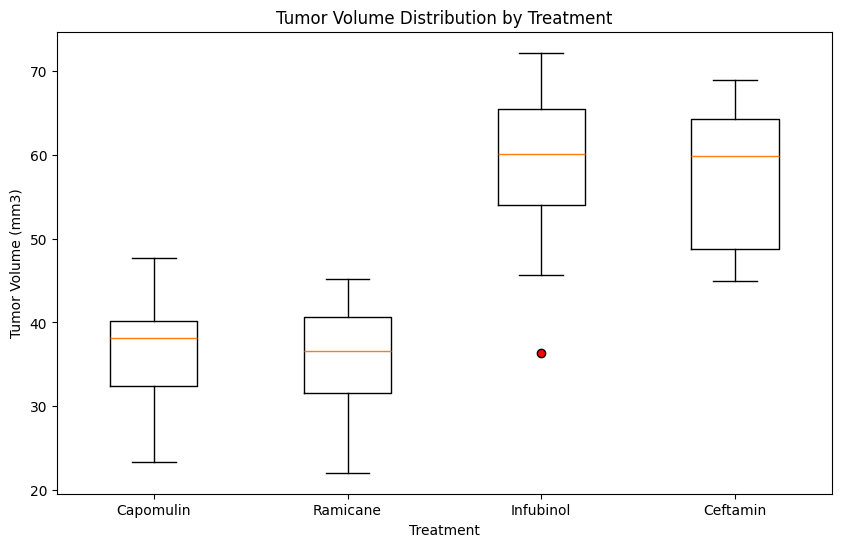

In [27]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Number of instances for Mouse ID 'b128': 10


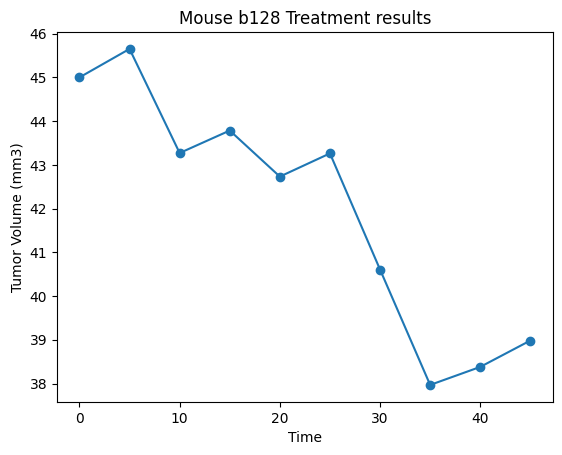

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
specific_mouse_id = 'b128'
mouse_count = merge_df['Mouse ID'].value_counts().get(specific_mouse_id, 0)
print(f"Number of instances for Mouse ID '{specific_mouse_id}':", mouse_count)
specific_mouse_data = merge_df[merge_df['Mouse ID'] == specific_mouse_id]
#print(f"Data for Mouse ID '{specific_mouse_id}':\n", specific_mouse_data)

plt.plot(specific_mouse_data['Timepoint'], specific_mouse_data['Tumor Volume (mm3)'], marker='o')

# Add title and labels
plt.title('Mouse b128 Treatment results')
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

Data for Capomulin:
 [['s185', 'Capomulin', 'Female', 3, 17, 0, 45.0, 0], ['s185', 'Capomulin', 'Female', 3, 17, 5, 43.87849569, 0], ['s185', 'Capomulin', 'Female', 3, 17, 10, 37.61494768, 0], ['s185', 'Capomulin', 'Female', 3, 17, 15, 38.17723195, 0], ['s185', 'Capomulin', 'Female', 3, 17, 20, 36.86687576, 0], ['s185', 'Capomulin', 'Female', 3, 17, 25, 33.94994037, 0], ['s185', 'Capomulin', 'Female', 3, 17, 30, 32.95967078, 1], ['s185', 'Capomulin', 'Female', 3, 17, 35, 28.32853059, 1], ['s185', 'Capomulin', 'Female', 3, 17, 40, 25.47214326, 1], ['s185', 'Capomulin', 'Female', 3, 17, 45, 23.34359787, 1], ['x401', 'Capomulin', 'Female', 16, 15, 0, 45.0, 0], ['x401', 'Capomulin', 'Female', 16, 15, 5, 45.47375302, 0], ['x401', 'Capomulin', 'Female', 16, 15, 10, 39.11389068, 0], ['x401', 'Capomulin', 'Female', 16, 15, 15, 39.77625003, 0], ['x401', 'Capomulin', 'Female', 16, 15, 20, 36.06583471, 0], ['x401', 'Capomulin', 'Female', 16, 15, 25, 36.61712031, 0], ['x401', 'Capomulin', 'Female'

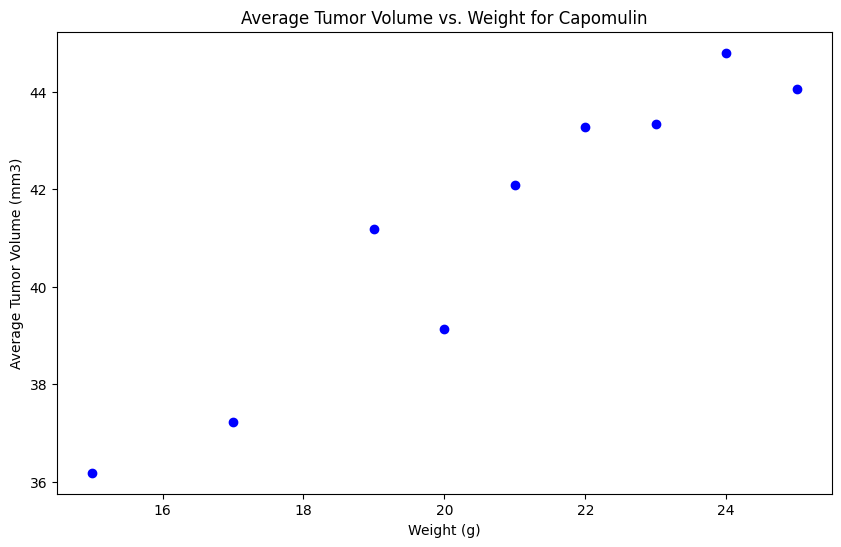

In [31]:
capomulin_data = merge_df[merge_df['Drug Regimen'] == 'Capomulin']
capomulin_list = capomulin_data.values.tolist()

print("Data for Capomulin:\n", capomulin_list)

# Calculate the mean Tumor Volume (mm3) for each mouse weight
mean_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_tumor_volume['Weight (g)'], mean_tumor_volume['Tumor Volume (mm3)'], marker='o', color='b')
plt.title("Average Tumor Volume vs. Weight for Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

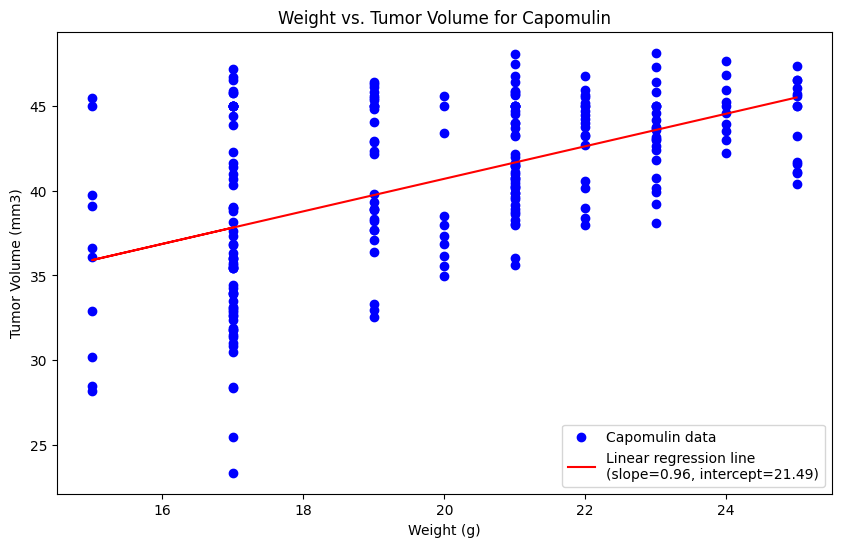

r=: 0.525699555207717


In [44]:
x_values = capomulin_data['Weight (g)']
y_values = capomulin_data['Tumor Volume (mm3)']
(slope, intercept, r_value, p_value, std_err) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker='o', color='b', label='Capomulin data')
plt.plot(x_values, regress_values, color='r', label=f'Linear regression line\n(slope={slope:.2f}, intercept={intercept:.2f})')
plt.title("Weight vs. Tumor Volume for Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()
print(f"r=: {r_value}")